# MNIST  
`pip install ipywidgets`

In [13]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np

def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, ))
    x = torch.from_numpy(x)
    return x

trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)

print(trainset)

print("=====DataLoader 變成 可以batch & shuffle===================================")
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)


# print('trainset.train_data=',len(trainset.train_data))
print('trainset.data=',len(trainset.data))
#print('trainset.test_data=',len(testset.test_data))
print('testset.data=',len(testset.data))

# print('trainset.train_data.numpy().shape=',trainset.train_data.numpy().shape)
print('trainset.data.numpy().shape=',trainset.data.numpy().shape)
print('trainset.targets.numpy().shape=',trainset.targets.numpy().shape)
print('trainset.targets.numpy()=',trainset.targets.numpy())

print('testset.data.numpy().shape=',testset.data.numpy().shape)
print('testset.targets.numpy().shape=',testset.targets.numpy().shape)
print('testset.targets.numpy()=',testset.targets.numpy())

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./dataset/mnist
    Split: Train
    StandardTransform
Transform: <function data_transform at 0x00000204EBDFE4C0>
=====DataLoader 變成 可以batch & shuffle===================================
trainset.data= 60000
testset.data= 10000
trainset.data.numpy().shape= (60000, 28, 28)
trainset.targets.numpy().shape= (60000,)
trainset.targets.numpy()= [5 0 4 ... 5 6 8]
testset.data.numpy().shape= (10000, 28, 28)
testset.targets.numpy().shape= (10000,)
testset.targets.numpy()= [7 2 1 ... 4 5 6]


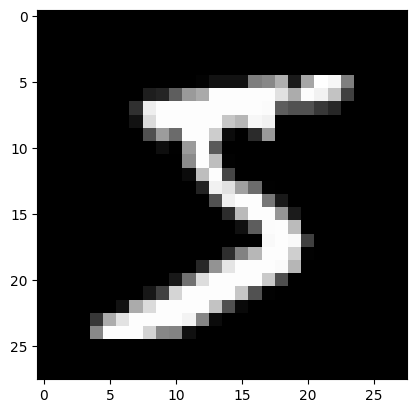

In [14]:
import matplotlib.pyplot as plt
# 轉成numpy 才能show
plt.imshow(trainset.data[0].numpy(),cmap='gray')

In [12]:
for images, labels in train_data: # batch_size=64 ，一次get  64筆資料
    print(images.shape)
    print(labels.shape)
    print(images)
    print(labels)

    break   

torch.Size([64, 784])
torch.Size([64])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([2, 5, 4, 0, 8, 3, 6, 9, 8, 8, 4, 0, 1, 4, 6, 1, 3, 1, 8, 2, 0, 4, 0, 4,
        6, 1, 1, 5, 6, 4, 8, 6, 5, 4, 4, 0, 1, 8, 1, 0, 6, 1, 8, 3, 1, 0, 8, 4,
        6, 2, 5, 2, 5, 0, 4, 1, 8, 2, 4, 8, 5, 1, 2, 8])


## Build DNN Model(Functional API): method 1

In [16]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F # Functional API 使用
from torch.utils.data import DataLoader
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)
print(model)

for param in model.parameters():
    print('type(param.data)=',type(param.data))
    print('param.size()', param.size())
    print("-----------------------------------")
    
param_list = list(model.parameters())
print(param_list[0].shape)
print(param_list[1].shape)
print(param_list[2].shape)
print(param_list[0])

Using cpu device
DNN(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=250, bias=True)
  (fc3): Linear(in_features=250, out_features=125, bias=True)
  (fc4): Linear(in_features=125, out_features=10, bias=True)
)
type(param.data)= <class 'torch.Tensor'>
param.size() torch.Size([500, 784])
-----------------------------------
type(param.data)= <class 'torch.Tensor'>
param.size() torch.Size([500])
-----------------------------------
type(param.data)= <class 'torch.Tensor'>
param.size() torch.Size([250, 500])
-----------------------------------
type(param.data)= <class 'torch.Tensor'>
param.size() torch.Size([250])
-----------------------------------
type(param.data)= <class 'torch.Tensor'>
param.size() torch.Size([125, 250])
-----------------------------------
type(param.data)= <class 'torch.Tensor'>
param.size() torch.Size([125])
-----------------------------------
type(param.data)= <class 'torch.Tensor'>
param.size() torch.Size([

## Build DNN Model(Sequential API) method 2

In [ ]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from collections import OrderedDict
%matplotlib inline
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__() # method 1
                self.seq = nn.Sequential(nn.Linear(28*28, 500),nn.ReLU(),
                   nn.Linear(500, 250),nn.ReLU(),
                   nn.Linear(250, 125),nn.ReLU(),
                   nn.Linear(125, 10))
        ''' (# method 2)
        self.seq = nn.Sequential()
        self.seq.add_module('FC1', nn.Linear(28*28, 500))
        self.seq.add_module('AC1', nn.ReLU())
        self.seq.add_module('FC2', nn.Linear(500, 250))
        self.seq.add_module('AC2', nn.ReLU())
        self.seq.add_module('FC3', nn.Linear(250, 125))
        self.seq.add_module('AC3', nn.ReLU())
        self.seq.add_module('FC4', nn.Linear(125, 10))
        self.seq.add_module('AC4', nn.ReLU())
        '''
        
        ''' (# method 3)
        self.seq = nn.Sequential(
                 OrderedDict([
                 ('FC1', nn.Linear(28*28, 500)),
                 ('AC1', nn.ReLU()),
                 ('FC2', nn.Linear(500, 250)),
                 ('AC2', nn.ReLU()),
                 ('FC3', nn.Linear(250, 125)),
                 ('AC3', nn.ReLU()),
                 ('FC4', nn.Linear(120, 10)),
                 ('AC4', nn.ReLU())]))
        '''
    def forward(self, x):
        return self.seq(x)
# build model
model = DNN().to(device)
print(model)
for param in model.parameters():
    print(type(param.data), param.size())
print(model.seq[0].weight.shape) # seq[0] 第一層
print(model.seq[0].bias.shape)
print(model.seq[0].weight)



# Build DNN Model(ModuleList API)

In [18]:
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
from collections import OrderedDict
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.modlist = nn.ModuleList([
                       nn.Linear(28*28, 500),
                       nn.ReLU(),
                       nn.Linear(500, 250),
                       nn.ReLU(),
                       nn.Linear(250, 125),
                       nn.ReLU(),
                       nn.Linear(125, 10)
                       ])

    def forward(self, x):
        for m in self.modlist:
            x = m(x)
        return x
        
# build model
model = DNN().to(device)
print('model=\n',model)

for param in model.parameters():
    print('type(param.data),param.size()= ',type(param.data), param.size())
    
    
#for param in model.parameters():
#    print(type(param.data), param.size())
    
print('first layer weight.shape=',model.modlist[0].weight.shape)
print('first layer bias.shape=',model.modlist[0].bias.shape)
print('first layer weight=\n',model.modlist[0].weight)

   
    
    




Using cpu device
model=
 DNN(
  (modlist): ModuleList(
    (0): Linear(in_features=784, out_features=500, bias=True)
    (1): ReLU()
    (2): Linear(in_features=500, out_features=250, bias=True)
    (3): ReLU()
    (4): Linear(in_features=250, out_features=125, bias=True)
    (5): ReLU()
    (6): Linear(in_features=125, out_features=10, bias=True)
  )
)
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([500, 784])
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([500])
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([250, 500])
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([250])
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([125, 250])
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([125])
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([10, 125])
type(param.data),param.size()=  <class 'torch.Tensor'> torch.Size([10])
first layer weight.shape= torch.Size([500,

## Initialization (網路初始化)

In [ ]:
# Initialization method 1
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
%matplotlib inline

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
        
        
        # Initialization start ========================================
        #nn.init.normal_(self.fc1.weight)  # 高斯常態分布用這行
        nn.init.xavier_normal_(self.fc1.weight)  # 更進階的初始化  nn.init.xavier_normal_
        nn.init.xavier_normal_(self.fc2.weight)
        nn.init.xavier_normal_(self.fc3.weight)
        nn.init.xavier_normal_(self.fc4.weight)
        # Initialization End ========================================
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)
print(model)    
param_list = list(model.parameters())
print(param_list[0])

In [ ]:
# Initialization method 2
import torch 
import numpy as np 
from torchvision.datasets import mnist
from torch import nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import DataLoader
%matplotlib inline
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# build model
model = DNN().to(device)

# Initialization start ========================================
def init_weights(m):
    if type(m) == nn.Linear: # if fc layer 才 Initialize
        nn.init.xavier_normal_(m.weight)
        #nn.init.normal_(m.weight)

# Applying it to our net
model.apply(init_weights)
# Initialization End ========================================

param_list = list(model.parameters())

print(param_list[0])

# Build Model

In [19]:
import torch
from torchvision.datasets import mnist
from torch.utils.data import DataLoader
import numpy as np
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))
def data_transform(x):
    x = np.array(x, dtype = 'float32') / 255
    x = x.reshape((-1, ))
    x = torch.from_numpy(x)
    return x
trainset = mnist.MNIST('./dataset/mnist', train=True, transform=data_transform, download=True)
testset = mnist.MNIST('./dataset/mnist', train = False, transform=data_transform, download=True)
train_data = DataLoader(trainset, batch_size=64, shuffle=True)
test_data = DataLoader(testset, batch_size=128, shuffle=False)
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 125)
        self.fc4 = nn.Linear(125, 10)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x
# build model
model = DNN().to(device)
model.train()

pred1 = model(trainset.data[0:5].reshape(-1,784).float())
#pred1 = model(trainset.train_data[0].reshape(-1,784).float())
print(pred1.shape)
print(pred1)
'''
for im, label in train_data:
    print(im.shape)
    pred2 = model(im) 
    print(pred2.shape)
    print(pred2)

    break
'''

Using cpu device
torch.Size([5, 10])
tensor([[ 1.6009,  6.1781,  7.2872,  0.6032,  1.8713,  5.3168, -0.0864, -1.5096,
         -4.9341,  4.1554],
        [-2.5197,  2.3329,  4.1382, -2.4944,  1.8255,  2.9959,  2.1096,  0.0860,
         -0.4348,  1.2755],
        [ 1.3931,  2.9429,  3.0366,  0.5293,  0.2767,  8.6070,  2.1520,  0.5572,
         -3.6030,  2.1987],
        [ 1.8763,  0.9441,  4.9980, -5.0999,  2.8834,  3.9257,  0.7538, -3.4693,
         -3.7602, -0.5121],
        [ 0.0112,  3.6891,  4.6598, -5.4643, -1.2188,  6.6869,  1.4364, -1.9972,
         -1.8299, -0.5845]], grad_fn=<AddmmBackward0>)


'\nfor im, label in train_data:\n    print(im.shape)\n    pred2 = model(im) \n    print(pred2.shape)\n    print(pred2)\n\n    break\n'